# Semana 3 - Actividad 1 / Limpieza de datos

## Equipo 62

## **Ricardo Morales Bustillos - A01740032**
## **Alejandro Jesús Vázquez Navarro - A01793146**

### Ciencia y analítica de Datos (Gpo 10)

### Profesor: Dr. Jobish Vallikavungal Devassia

### 3 de octubre de 2022

# Parte 1
**1. Fundamentos de base de datos y para ciencia de datos**

Debemos partir de la definición más pura: ¿qué es una base de datos? En el sentido más sencillo de la palabra, es una colección de listas que están organizadas por columnas. Estas listas las conoceremos como tablas que a su vez están conformadas por campos y por filas. Dicho de otro modo, una base de datos es una colección bien organizada de datos que guardan una relación perfectamente identificada. Las bases de datos son fundamentales para el funcionamiento crítico de cualquier compañía pues estarán orientadas (como gran colección) a una sola función de negocio. Es decir, podremos tener bases de datos orientadas a Recursos Humanos, Finanzas, Marketing, en fin, a cualquier función de negocio.

La ciencia de datos echa mano de las bases de datos para transformar datos crudos en información, posteriormente en conocimiento y en algunos estadíos más avanzados llegar hasta la sabiduría. Dicho lo anterior, la responsabilidad de un científico de datos será conocer tres grandes ámbitos de conocimiento: la parte matemática, la parte tecnológica y una vertical de negocio. En la convergencia de estos tres conjuntos encontramos a la Ciencia de Datos.

El punto más valiosos de todo este flujo de transformación (dato crudo, transformación en información y extracción de conocimiento) es la entrega de valor al negocio y convertirlo en accionables.


---


**2. Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos**

Derivado del gran crecimiento de información es necesario contar con un paradigma que permita acceder de manera rápida, confiable y organizada a la inforamción que los tomadores de decisiones necesitan. Es por esto, que Imonn y Kimball definieron dos grandes aproximaciones para poder conformar una bóveda de datos. Por un lado tenemos la visión de Kimball donde los datamarts son creados primeros, después, a medida que son solicitados, estos se agregan al Data Warehouse. Immon al contrario, veía al Data Warehouse como un repositorio centralizado de información desde el momento cero de su concepción y por lo tanto almacena el dato desde su forma más atómica y granular posible. 

Como científicos de datos debemos tener conocimiento en el manejo de Data Warehouse (datos estructurados o Bases de datos SQL) y en Data Lakes (bases de datos NoSql) ya que los desafíos constantes de la industria ya exigen estas competencias. 

Es importante mencionar que no importando la aproximación que le demos a nuestro Data Warehouse, este siempre tendrá las siguientes características: debe contener datos históricos, no volátiles, datamarts enfocados a funciones específicas de negocio y debe estar integrado en una plataforma.








# Parte 2
#### Limpieza y preparación de datos

In [1]:
# Importación de librerías necesarias para la lectura y tratamiento de datos

import pandas as pd
import numpy as np

In [2]:
# Lectura de los datos de ejercicio

df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")
df.head() 



,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
# Asignación de cabeceras de acuerdo a la información proporcionada:

#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year). 
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

# Creo un diccionario con los nombres de las columnas
col_dictionary = {'X1':'given_credit', 
                  'X2': 'gender', 
                  'X3': 'education', 
                  'X4': 'marital_status', 
                  'X5': 'age', 
                  'X6':'sep05_repayment',
                  'X7':'aug05_repayment',
                  'X8':'jul05_repayment',
                  'X9':'jun05_repayment',
                  'X10':'may05_repayment',
                  'X11':'abr05_repayment',
                  'X12': 'sep05_bill_statement',
                  'X13': 'aug05_bill_statement',
                  'X14': 'jul05_bill_statement',
                  'X15': 'jun05_bill_statement',
                  'X16': 'may05_bill_statement',
                  'X17': 'abr05_bill_statement',
                  'X18': 'sep05_previous_payment',
                  'X19': 'aug05_previous_payment',
                  'X20': 'jul05_previous_payment',
                  'X21': 'jun05_previous_payment',
                  'X22': 'mayu05_previous_payment',
                  'X23': 'abr05_previous_payment'                  
                  }

# Renombro las columnas para tener un mejor entendimiento del dataset
df.rename(columns = col_dictionary , inplace=True)

df.head()
#df.columns


,ID,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,jun05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
# Guardo el dataframe en un archivo .csv para su posterior utillización

df.to_csv("my_data.csv", encoding="utf-8")

# Será importante almacenar la cantidad original de registros para entender el tamaño original

original_size_df = len(df)
print(f'El tamaño original del dataset es de {original_size_df}')

El tamaño original del dataset es de 30000


In [5]:
# Vamos a comenzar la verificación de la calidad del dato
# ¿Tenemos nulos tenemos?

df.isnull().values.any()



True

In [6]:
# Sí tenemos, veamos en qué columnas
df.isnull().any()

ID                         False
given_credit               False
gender                      True
education                   True
marital_status              True
age                         True
sep05_repayment             True
aug05_repayment             True
jul05_repayment             True
jun05_repayment             True
may05_repayment             True
abr05_repayment             True
sep05_bill_statement        True
aug05_bill_statement        True
jul05_bill_statement        True
jun05_bill_statement        True
may05_bill_statement        True
abr05_bill_statement        True
sep05_previous_payment      True
aug05_previous_payment      True
jul05_previous_payment      True
jun05_previous_payment      True
mayu05_previous_payment     True
abr05_previous_payment      True
Y                           True
dtype: bool

In [7]:
# Prácticamente en todas las columnas

In [8]:
# ¿Tenemos datos con na?
df.isna().any()

ID                         False
given_credit               False
gender                      True
education                   True
marital_status              True
age                         True
sep05_repayment             True
aug05_repayment             True
jul05_repayment             True
jun05_repayment             True
may05_repayment             True
abr05_repayment             True
sep05_bill_statement        True
aug05_bill_statement        True
jul05_bill_statement        True
jun05_bill_statement        True
may05_bill_statement        True
abr05_bill_statement        True
sep05_previous_payment      True
aug05_previous_payment      True
jul05_previous_payment      True
jun05_previous_payment      True
mayu05_previous_payment     True
abr05_previous_payment      True
Y                           True
dtype: bool

In [9]:
# Excepto en ID y given_credit, prácticamente en todas las columnas existen datos na
# Entonces, ¿qué podemos hacer?
# Como refiere la literatura, podemos descartar los valores faltantes:

df.dropna(inplace=True)

In [10]:
# Veamos cuántos datos tenemos en na

df.isna().values.any()


False

In [11]:
# Prácticamente ninguno... ¿pero habrán sido muchos los descartados?

dismissed_rows = original_size_df- len(df)
print("Cuántas filas hay en el dataset:", len(df))
print(f"Perdimos {dismissed_rows} registros que equivale al  {(dismissed_rows / original_size_df) * 100}")

Cuántas filas hay en el dataset: 29958
Perdimos 42 registros que equivale al  0.13999999999999999


In [12]:
# Recuperemos el dataframe original para hacer más pruebas

df2 = pd.read_csv("my_data.csv", encoding="utf-8")
dfOriginal = df2.copy()
# Hacemos una copia para poder analizar el dataframe original más adelante
df3 = df2.copy()

# Verificamos nuevamente la calidad del dataframe

df2.isna().any() 

Unnamed: 0                 False
ID                         False
given_credit               False
gender                      True
education                   True
marital_status              True
age                         True
sep05_repayment             True
aug05_repayment             True
jul05_repayment             True
jun05_repayment             True
may05_repayment             True
abr05_repayment             True
sep05_bill_statement        True
aug05_bill_statement        True
jul05_bill_statement        True
jun05_bill_statement        True
may05_bill_statement        True
abr05_bill_statement        True
sep05_previous_payment      True
aug05_previous_payment      True
jul05_previous_payment      True
jun05_previous_payment      True
mayu05_previous_payment     True
abr05_previous_payment      True
Y                           True
dtype: bool

In [13]:
# Una técnica interesante es eliminar columnas donde falte al menos un elemento en toda la columna

df2.dropna(axis = 1, inplace=True)

In [14]:
# ¿Cuál es el resultado?

df2.head()

# ¡Solo tenemos 4 columnas! Esto claramente no nos va a ayudar a nuestros análisis porque no estamos aplicando ningún criterio duro para eliminarlas, 
# solamente aplicamos el criterio de eliminación si existe un na en una columna y eso no es suficiente


,Unnamed: 0,ID,given_credit
0,0,1,20000
1,1,2,120000
2,2,3,90000
3,3,4,50000
4,4,5,50000


In [15]:
# Intenemos eliminar solo las filas donde hay elementos perdidos

df3.dropna(how = "all", inplace=True)

# Veamos
df3

# Tenemos 30k registros aún.

,Unnamed: 0,ID,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
0,0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [16]:
# Es posible también aplicar umbrales para determinar cuántas filas eliminaremos.
# En el ejercicio se pide que mantengamos las filas con al menos 2 valores que no sean nan

dfAlMenos2Filas = df2.copy()
dfAlMenos2Filas.dropna(thresh =2 , axis=0, inplace=True)
dfAlMenos2Filas




,Unnamed: 0,ID,given_credit
0,0,1,20000
1,1,2,120000
2,2,3,90000
3,3,4,50000
4,4,5,50000
...,...,...,...
29995,29995,29996,220000
29996,29996,29997,150000
29997,29997,29998,30000
29998,29998,29999,80000


In [17]:
# Definir en qué columnas podemos buscar valores faltantes

dfValoresFaltantes = dfOriginal.copy()
dfValoresFaltantes 

dfValoresFaltantes.dropna(thresh = 5,  
           axis = 1, 
           inplace = True
           ) 
dfValoresFaltantes

,Unnamed: 0,ID,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
0,0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


# Solución 2


In [18]:
# Creamos una copia del dataframe original

miDataFrame = dfOriginal.copy()


In [19]:
# Esta solución calcula el peso de la columna que seleccionemos con datos nulos
# ¿Cuáles son las columnas con datos nulos?
miDataFrame.isna().any() 

# Prácticamente todas
# Usaré para esta solución la librería pandas-profiling para tener una mejor visión del estado de las cosas

from pandas_profiling import ProfileReport

profile = ProfileReport(miDataFrame)



In [20]:
#profile

Con base en este reporte, puedo determinar lo siguiente:
**_given_credit_** fue la variable con mayor densidad pues no tiene valores perdidos
y las variables siguientes son las que tienen el mayor número de datos nulos

- may05_bill_statement 17 missing
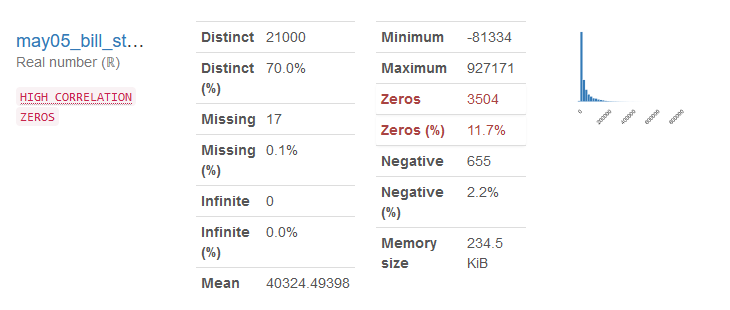

- abr05_repayment 14 missing
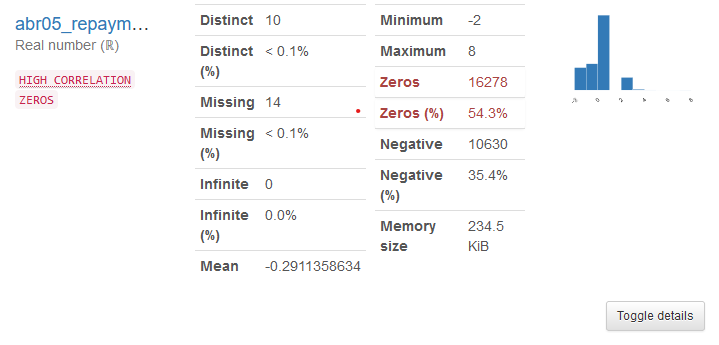

- sep05_bill_statement 11 missing
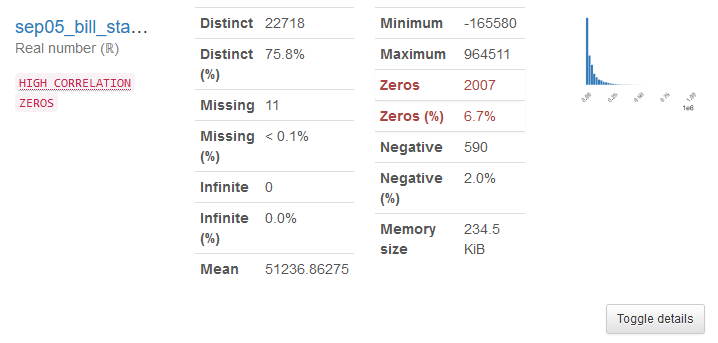

- jul05_bill_statement 13 missing
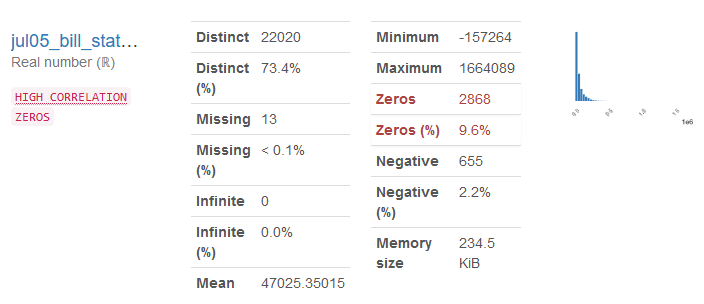

- jun05_bill_statement 15 missing
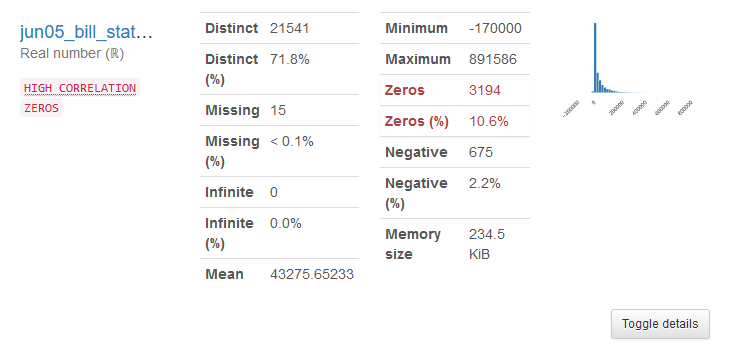

Así que puedo aplicar una técnica de media o mediana. Esto depende, si existen outliers, lo mejor será aplicar la mediana pues la media es altamente sensible a los outliers.



In [21]:
# may05_bill_statement es la columna con mayor cantidad de nulos
may05_bill_statement_median = miDataFrame.may05_bill_statement.median()
miDataFrame['may05_bill_statement'].fillna(value = may05_bill_statement_median, inplace = True)


In [22]:
# Mismo caso para abr05_repayment, sep05_bill_statement, jul05_bill_statement y jun05_bill_statement

abr05_repayment_median = miDataFrame.abr05_repayment.median()
miDataFrame['abr05_repayment'].fillna(value = may05_bill_statement_median, inplace = True)

sep05_bill_statement_median = miDataFrame.sep05_bill_statement.median()
miDataFrame['sep05_bill_statement'].fillna(value = sep05_bill_statement_median, inplace = True)

jul05_bill_statement_median = miDataFrame.jul05_bill_statement.median()
miDataFrame['may05_bill_statement'].fillna(value = jul05_bill_statement_median, inplace = True)

jun05_bill_statement_median = miDataFrame.jun05_bill_statement.median()
miDataFrame['jun05_bill_statement'].fillna(value = jun05_bill_statement_median, inplace = True)


No es necesario correr todo el profiler de pandas, puedo enfocarme solo en las columnas que imputé con mediana para revisar si en efecto ya no tienen datos nulos:


In [23]:
# Como se desmuestra, ya no existen valores nulos en las columnas mencionadas:

colsIniciales = ['abr05_repayment', 'sep05_bill_statement', 'may05_bill_statement', 'jun05_bill_statement']
miDataFrame[colsIniciales].isna().sum()



abr05_repayment         0
sep05_bill_statement    0
may05_bill_statement    0
jun05_bill_statement    0
dtype: int64

In [24]:
# Es posible volver a correr el informe de datos llamando al dataframe transformado:

profileLimpio = ProfileReport(miDataFrame)

# No lo correré pero está la referencia


In [25]:
# Otro dato interesante es que faltan 3 datos en la columna dependiente Y
miDataFrame["Y"].isna().sum()



3

In [26]:

# Veamos cuáles son y si vale la pena dejarlos o no.
miDataFrame[miDataFrame["Y"].isna()]

#Observamos que todas las variables de pagos anteriores no tienen pago y la dependiente está en nulo. 
#No ofrece valor al modelo y se eliminará

miDataFrame =miDataFrame.dropna(subset=['Y'])

#Volvemos a correr miDataFrame["Y"].isna().sum() para saber si quedaron algunas
miDataFrame["Y"].isna().sum()

# El resultado es 0. 

0

# Parte 3

Con base en los resultados de tu libreta de Google Colab de la Parte 2 responde detalladamente las siguientes preguntas: 

**¿Qué datos considero mas importantes?* ¿Por qué?**

De acuerdo al análisis realizado, las columnas (o características) más importantes fueron:<br>

1. given_credit,
2. education,
3. gender,
4. age,
5. marital_status

Esto debido a que registraron el menor número de datos perdidos. Inclusive, given_credito (incluyendo *ID*) fue la característica con cero valores nulos. Las variables demográficas registraron menor cantidad de datos perdidos que las variables que registraban la amortización del crédito.



**¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?**

Después del análisis realizado con pandas profile, se encontró que las siguientes variables contenían el mayor número de nulos:

1. may05_bill_statement **17 missing**
2. abr05_repayment **14 missing**
3. sep05_bill_statement **11 missing**
4. jul05_bill_statement **11 missing**
5. jun05_bill_statement **11 missing**

Siendo variables numéricas y después de analizar que existían outliers en ellas, se determinó que la mejor técnica de imputación de datos era aplicar la mediana para cada una de ellas, recordando que esta métrica no es sensible a los outliers.


**¿Es necesario ordenar los datos para el análisis? Sí / No / ¿Por qué?**

Depende, si se van a realizar agregados por columnas aplicando funciones escalares (sum, max, min, std, count) entonces sí es necesario ordenar para determinar qué grupo de elementos registra la métrica con mayor o menor valor.

Si solamente haremos cálculo de nulos, eliminar filas o columnas, entonces no es necesario ordenar los datos. No infiere esta operación en el resultado final.



**¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.**

La respuesta corta definitivamente es SÍ. Particularmente en este caso nos encontramos con el problema de las cabeceras. Los nombres de las columnas estaban en modo canónico y no semántico. Esto hace muy difícil poder identifcar el valor semántico de cada columna. El ejercicio incluía los nombres de las columnas y su cardinalidad, i.e la primera columna corresponde al Identificador, la segunda al crédito, etc. Gracias a esta asignación pudimos trabajar de manera más sencilla el análisis y evitamos confusiones posteriores.
Caer en este tipo de errores es muy frecuente cuando se realizan análisis exploratorios de datos sin contar con un diccionario de datos.


**¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?**

Considerando en análisis realizado gracias al profiler de pandas, fue posible identificar variables de amortización con datos nulos. Estos datos son altamente sensibles para poder determinar el nivel de morosidad de un cliente. Entonces era importante realizar una imputación de datos.

La técnica elegida fue imputar la mediana para evitar que la media pudiera sesgar el modelado.

Algo notable también fue eliminar algunas filas que tenían la variable dependiente Y en nulo y además no tenían datos para los pagos anteriores, al ser solamente 3, se determinó que lo mejor era quitar esas filas del modelo.
Un caso diferente hubiera sido si esos 3 datos hubieran contenido data en la columna Y. Ahí sí podrían haber tenido impacto en el modelo. 